# Bank Marketing Dataset Analysis

In this notebook, we will use the [Bank Marketing Dataset](https://www.kaggle.com/janiobachmann/bank-marketing-dataset) from Kaggle to build a model that predicts whether someone is going to make a deposit or not based on specific attributes. We will explore four different algorithms: Decision Tree, Random Forest, Naive Bayes, and K-Nearest Neighbors.

**Dataset and Objective**

The Bank Marketing Dataset provides valuable information for our analysis. Our objective is to develop a predictive model using various algorithms and compare their performance to identify the best model for our case.

**Model Building**

We will follow these steps:

1. Load the dataset and perform data preprocessing.
2. Build models using Decision Tree, Random Forest, Naive Bayes, and K-Nearest Neighbors algorithms.
3. Evaluate the performance of each model using suitable metrics.
4. Compare the models to determine the most effective one for our task.

**Model Optimization**

To improve our model's performance, we will tune its hyperparameters using GridSearch, a powerful optimization technique.

**Saving Results and Model**

After obtaining the prediction results from our dataset, we will save them for further analysis. Additionally, we will save the chosen model to ensure its reusability without repeating the entire process.

## Dependencies

To begin, we need to import and configure some essential libraries.

In [82]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Data Pre-Processing

In order to build our first model, we must first load and pre-process the data. This crucial step ensures that our model receives high-quality data to learn from, as the saying goes, "a model is only as good as its data." The data pre-processing phase will be divided into several steps, as described below.


## Loading Data

In this initial step, we will load our dataset, which has been conveniently uploaded to my GitHub repository to simplify the process. The dataset documentation can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Below is a list of the columns present in our data:

**Input variables:**
1. age (numeric)
2. job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3. marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' includes divorced or widowed)
4. education: level of education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has a housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has a personal loan? (categorical: 'no', 'yes', 'unknown')
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)
12. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted)
13. previous: number of contacts performed before this campaign and for this client (numeric)
14. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Output variable (desired target):**
21. y: has the client subscribed to a term deposit? (binary: 'yes', 'no')

According to the dataset documentation, we need to remove the 'duration' column because, in a real-case scenario, the duration is only known after the label column is known. This issue can be considered as 'data leakage,' where predictors include data that will not be available at the time of making predictions.


In [83]:
# Load dataset
df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')

# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [84]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

## Class Distribution

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [85]:
df_bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

## Missing Values

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the `is_null()` function from Pandas to check for any missing data and then use the `sum()` function to see the total of missing values in each column.

In [86]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

From the result we can be assured that our data have no missing value and are good to go. In the case where you did have missing value in your data you can solve it by doing imputation or just remove the column altogether depending on your case. [Here](https://www.kaggle.com/dansbecker/handling-missing-values) is a good Kaggle course on how to handle missing value in dataset.

## Scale Numeric Data

Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data. The scaling will be done using the formula below:

<div align="center">$Z = \frac{X - U}{S}$</div>

*Where:*

*$Z:$ scaled value*

*$X:$ original value*

*$U:$ mean of the data*

*$S:$ standard deviation of the data*

In [87]:
# # Import the StandardScaler class from the sklearn.preprocessing module
# from sklearn.preprocessing import StandardScaler

# # Copying the original dataframe
# df_bank_ready = df_bank.copy()

# # Create an instance of the StandardScaler class and assign it to the variable scaler
# scaler = StandardScaler()

# # Select columns with numerical data types (float64 and int64) from df_bank_ready and assign them to num_cols
# num_cols = df_bank_ready.select_dtypes(include=['float64', 'int64']).columns

# # Fit and transform the selected numerical columns using the fit_transform method of the scaler object,
# # and assign the transformed values back to the corresponding columns in df_bank_ready
# df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

# # Display the first few rows of the transformed dataframe, df_bank_ready
# df_bank_ready.head()

In [88]:
X = df_bank.drop('deposit', axis = 1)
y = df_bank["deposit"]

## Encode Categorical Value

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use `OneHotEncoder()` provided by sklearn. Basically it will transform a categorical column from this:

| marital | housing |
|----------|---------|
| single   | yes     |
| divorced | no      |
| married  | no      |

...into something like this...

| marital_single | marital_divorced | marital_married | housing_yes | housing_no |
|----------------|------------------|-----------------|-------------|------------|
| 1              | 0                | 0               | 1           | 0          |
| 0              | 1                | 0               | 0           | 1          |
| 0              | 0                | 1               | 0           | 1          |

In this code cell we will also encode our label column by replacing 'yes' and 'no' with 1 and 0 respectively. We can do this by applying simple lambda/in-line function on the column.

In [89]:
# Perform one-hot encoding on categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X_encoded = pd.DataFrame(ct.fit_transform(X))

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Split Dataset for Training and Testing

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case because we have enough data we will split the data with ratio of 80:20 for training and testing respectively. This will result in our training data having 8929 rows and 2233 rows for the testing data.

In [90]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded , y_encoded,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


# Modelling

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 4 different models with different algorithm. In this step we will create a baseline model for each algorithm using the default paramaeters set by sklearn and after building all 4 of our models we will compare them to see which works best for our case.

To evaluate our model we will use the confusion matrix as our base for the evaluation.

<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='250'></div>
where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes

In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who **actually** wanted to make a deposit can mean a lose opportunity/revenue.

Below we will define a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.

In [91]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Decision Tree

Decision tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/decision_tree.PNG' height='250'></div>

Advantages:
* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:
* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data

### Building Model

In [92]:
from sklearn import tree

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Model Evaluation

In [93]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6341244961934617
Precision: 0.6224390243902439
Recall: 0.5973782771535581
F1 Score: 0.6096512183468706
Cohens Kappa Score: 0.2656346796582817
Area Under Curve: 0.6325947179759207
Confusion Matrix:
 [[778 387]
 [430 638]]


## Random Forest

Random forest or Random Decision Forest is a method that operates by constructing multiple decision trees during training phases. The decision of the majority of the trees is chosen as final decision.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/random_forest.PNG' height='250'></div>

Advantages:
* It can be used for both regression and classification tasks and that it’s easy to view the relative importance it assigns to the input features.
* It is also considered as a very handy and easy to use algorithm, because it’s default hyper-parameters often produce a good prediction result.

Disadvantages:
* Many trees can make the algorithm to slow and ineffective for real-time predictions. A more accurate prediction requires more trees, which results in a slower model.
* It is a predictive modelling tool and not a descriptive tool.

### Building Model

In [94]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Model Evaluation

In [95]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.7210031347962382
Precision: 0.750281214848144
Recall: 0.6245318352059925
F1 Score: 0.681655595298927
Cohens Kappa Score: 0.4370232089085043
Area Under Curve: 0.7821522721062193
Confusion Matrix:
 [[943 222]
 [401 667]]


## Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

For example, given:
* A doctor knows that meningitis  causes  stiff neck 50% of the time
* Prior probability  of any patient  having  meningitis  is 1/50,000
* Prior probability  of any patient  having  stiff neck is 1/20

Then the probability of patient who have stiff neck to also have meningitis is:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)} = \frac{0.5 * (1 / 50000)}{1 / 20} = 0.0002$</div>

### Building Model

In [96]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Model Evaluation

In [97]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6909986565158979
Precision: 0.7441860465116279
Recall: 0.5393258426966292
F1 Score: 0.6254071661237784
Cohens Kappa Score: 0.3736508718569125
Area Under Curve: 0.7459589140184211
Confusion Matrix:
 [[967 198]
 [492 576]]


## K-Nearest Neighbors

K-Nearest Neighbors (KNN) classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. For example in the image below where $k = 3$ majority of it's neighbor is classified as B, but when $k = 7$ the majority will changes to A.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/knn.PNG' height='200'></div>

Advantages:
* Simple technique that is easily implemented
* Building model is cheap
* Extremely flexible classification scheme

Disadvantages:
* Classifying unknown records are relatively expensive
* Requires distance computation of k-nearest neighbors
* Computationally intensive, especially when the size of the training set grows
* Accuracy can be severely degraded by the presence of noisy or irrelevant features

### Building Model

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [99]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.5888938647559337
Precision: 0.5801282051282052
Recall: 0.5084269662921348
F1 Score: 0.5419161676646705
Cohens Kappa Score: 0.1719727779043445
Area Under Curve: 0.614725691597949
Confusion Matrix:
 [[772 393]
 [525 543]]


## Model Comparison

After building all of our model, we can now compare how well each model perform. To do this we will create two chart, first is a grouped bar chart to display the value of accuracy, precision, recall, f1, and kappa score of our model, and second a line chart to show the AUC of all our models.

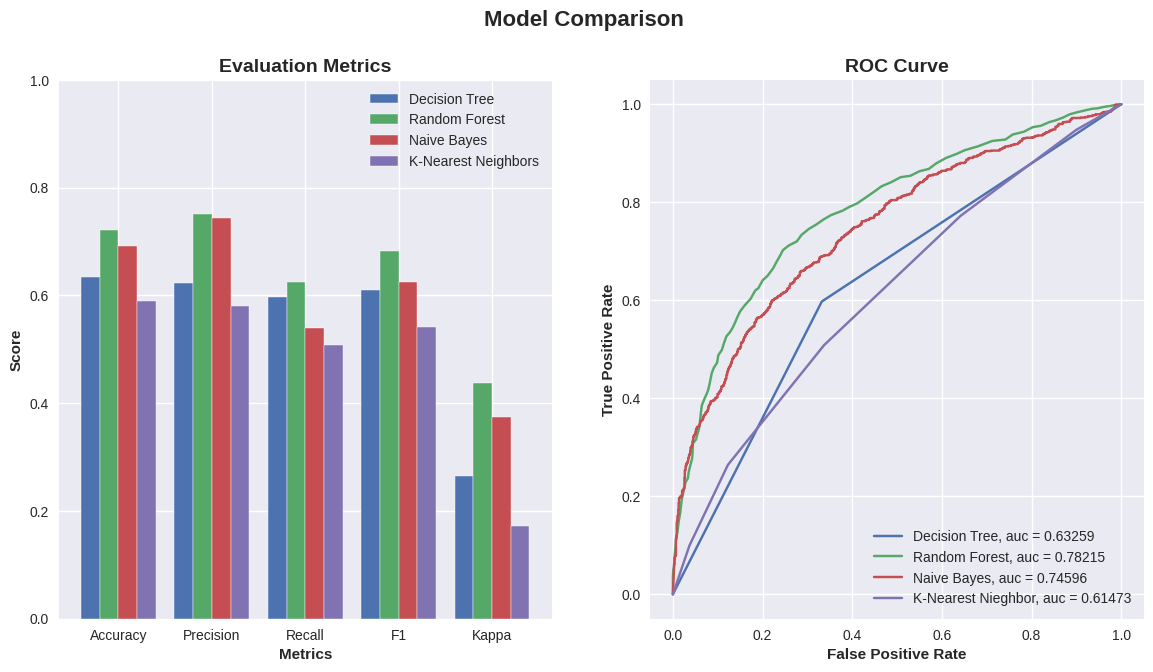

In [100]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

From the figures above we can see that our Random Forest model tops the other models in 5 of the 6 metrics we evaluate, except precision. So we can assume that Random Forest is the right choice to solve our problem.

# Model Optimisation

On the next part of this notebook, we will try to optimise our RandomForest model by tuning the hyper parameters available from the scikit-learn library. After finding the optimal parameters we will then evaluate our new model by comparing it against our base line model before.

## Tuning Hyperparameter with GridSearchCV

We will use `GridSearchCV` functionality from sklearn to find the optimal parameter for our model. We will provide our baseline model (named `rf_grids`), scoring method (in our case we will use recall as explained before), and also various parameters value we want to try with our model. The `GridSearchCV` function will then iterate through each parameters combination to find the best scoring parameters.

This function also allow us to use cross validation to train our model, where on each iteration our data will be divided into 5 (the number are adjustable from the parameter) fold. The models then will be trained on 4/5 fold of the data leaving the final fold as validation data, this process will be repeated for 5 times until all of our folds are used as validation data.

<div align='center'><img src='https://i.imgur.com/9k60cVA.png' height='200'></div>

To see the result of which parameters combination works best we can access the `best_params_` attribute from our grid search object.

*Note: The more combination provided, the longer the process will take. Alternatively, you can also try `RandomizedSearchCV` to only randomly select specified number of parameters which can result in faster running time.*

In [101]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

## Evaluating Optimised Model

After finding the best parameter for the model we can access the `best_estimator_` attribute of the GridSearchCV object to save our optimised model into variable called `best_grid`. We will calculate the 6 evaluation metrics using our helper function to compare it with our base model on the next step.

In [102]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Accuracy: 0.7227944469323779
Precision: 0.7682198327359617
Recall: 0.6020599250936329
F1 Score: 0.6750656167979002
Cohens Kappa Score: 0.4394937131822648
Area Under Curve: 0.7884883702239155
Confusion Matrix:
 [[971 194]
 [425 643]]


## Model Comparison

The code below will draw the same plot as before only with our original Random Forest model and it's optimised version. It will also print the change on each evaluation metrics to help us see if our optimised model work better than the original one.

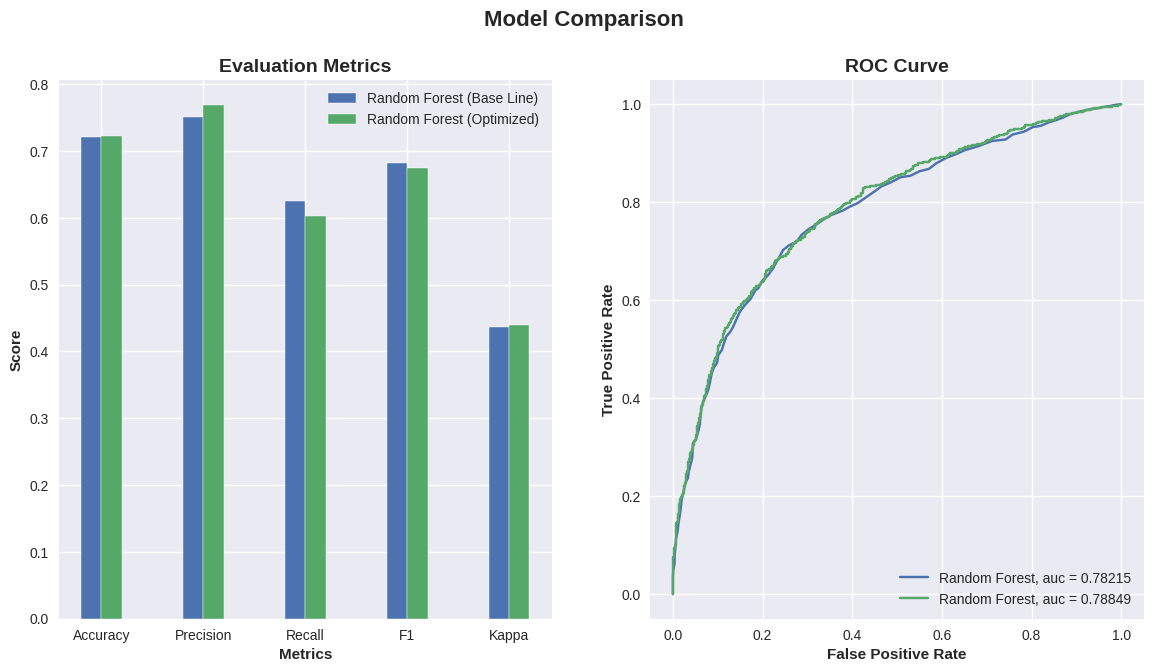

Change of 0.25% on accuracy.
Change of 2.39% on precision.
Change of -3.60% on recall.
Change of -0.97% on F1 score.
Change of 0.57% on Kappa score.
Change of 0.81% on AUC.


In [103]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

The result show that our optimised performed little bit better than the original model. The optimised models show an increase in 4 out of the 6 metrics but perform worse in the other metrics, especially the recall with -4.34% decrease. Because we want to focus on predicting as many actual positive values as possible we should stick with our original model for the prediction because it has higher recall score.

# Output

We have our model, what's next? As a data scientist, it's crucial to focus on developing a model with good re-usability. In this final part, I will explain how to generate predictions based on new data and demonstrate the process of saving and loading your model using `joblib`. This way, you can utilize it in production or save it for later use, eliminating the need to repeat the entire model creation process.

## Prediction

In this step we will predict the expected outcome of all the row from our dataset then save it into a csv file for easier access in the future.

In [104]:
data = [59, 'admin.', 'married', 'secondary', 'no', 2343, 'yes', 'no', 'unknown', 5, 'may', 1, -1, 0, 'unknown']
columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome']

new_data = pd.DataFrame([data], columns=columns)

In [105]:
new_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown


Preprocess the new data using the same preprocessing steps as before

In [106]:
X_new_encoded = pd.DataFrame(ct.transform(new_data))

 Make predictions using your trained random forest classifier:

In [107]:
y_new_pred = rf.predict(X_new_encoded)

Interpret the predictions based on the classes used during training. If your model was trained on binary classification with classes 0 and 1, you can map the predictions back to meaningful labels or interpretations:

In [108]:
prediction_labels = label_encoder.inverse_transform(y_new_pred)
print(f"Predicted Labels: {prediction_labels}")

Predicted Labels: ['yes']


In [109]:
HOME = "/content/drive/MyDrive/FlaskClassificationApp"
%cd {HOME}

/content/drive/MyDrive/FlaskClassificationApp


## Saving model

We can also save our model for further model reusability. This model can then be loaded on another machine to make new prediction without doing the whole training process again.

In [110]:
from joblib import dump, load

# Saving model
dump(rf, 'bank_deposit_classification.joblib')

# Loading model
# clf = load('bank_deposit_classification.joblib')

['bank_deposit_classification.joblib']

Preprocessing Components: Save the necessary preprocessing components to ensure consistency between your training and deployment environments. This includes the `ColumnTransformer` and the `LabelEncoder`. You can save these preprocessing components using the joblib library in a similar way as the model:

In [112]:
# Save the ColumnTransformer
dump(ct, 'column_transformer.joblib')

# Save the LabelEncoder
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

Later, you can load these preprocessing components to preprocess the incoming data:

In [113]:
# Load the ColumnTransformer
ct = load('column_transformer.joblib')

# Load the LabelEncoder
label_encoder = load('label_encoder.joblib')

# Conclusion

# Model Evaluation and Improvement

After examining our simple model, we can observe that it performed reasonably well in classifying the data. However, there are still some weaknesses, particularly highlighted in the recall metric, where we achieved only approximately 60%. This implies that our model can only identify 60% of potential customers, missing out on the remaining 40%. Furthermore, optimizing the model using `GridSearchCV` did not yield significantly different results, indicating that we may have reached the limitations of this particular model.

In order to enhance our performance, we should consider exploring alternative algorithms, such as the `GradientBoostingClassifier`. By employing this algorithm, we may be able to overcome the limitations of our current model and improve its predictive capabilities.


# References

1. Telkom Digital Talent Incubator - Data Scientist Module 5 (Classification)
2. [Scikit-learn Documentation](https://scikit-learn.org/stable/index.html)
3. [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
4. [The Python Graph Gallery - Grouped Bar Plot](https://python-graph-gallery.com/11-grouped-barplot/)
5. [Building Classification Model with Python](https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b)